In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("denkuznetz/taxi-price-prediction")

print("Path to dataset files:", path)

# obtain the names of the files in the downloaded folder
files = os.listdir(path)
print("Files in dataset:", files)

Path to dataset files: /Users/francescavasta/.cache/kagglehub/datasets/denkuznetz/taxi-price-prediction/versions/1
Files in dataset: ['taxi_trip_pricing.csv']


In [90]:
import pandas as pd

df_taxi = pd.read_csv("/Users/francescavasta/.cache/kagglehub/datasets/denkuznetz/taxi-price-prediction/versions/1/taxi_trip_pricing.csv")
df_taxi.head()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [91]:
print(df_taxi.shape)
df_taxi.info()

(1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [92]:
df_taxi.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [93]:
df_taxi.var()

/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_65197/4150573252.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_taxi.var()


Trip_Distance_km          396.220960
Passenger_Count             1.214953
Base_Fare                   0.757182
Per_Km_Rate                 0.184742
Per_Minute_Rate             0.013361
Trip_Duration_Minutes    1033.905855
Trip_Price               1637.803947
dtype: float64

In [94]:
# Calcolare il numero di NaN per ogni riga
na_counts = df_taxi.isna().sum(axis=1)

# Calcolare la distribuzione di righe con un numero specifico di NaN
distribution = na_counts.value_counts().sort_index()

# Mostrare la distribuzione
print(distribution)

0    562
1    341
2     83
3     14
dtype: int64


In [95]:
df_taxi= df_taxi.dropna(axis=0, thresh=9)

df_taxi.shape

(986, 11)

In [96]:
print(df_taxi.isna().sum())

Trip_Distance_km         47
Time_of_Day              49
Day_of_Week              43
Passenger_Count          44
Traffic_Conditions       47
Weather                  46
Base_Fare                48
Per_Km_Rate              47
Per_Minute_Rate          47
Trip_Duration_Minutes    45
Trip_Price               44
dtype: int64


In [97]:
df_taxi.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,939.000000,942.000000,938.000000,939.000000,939.000000,941.000000,942.000000
mean,27.135015,2.469214,3.500522,1.234888,0.292662,62.145834,56.899296
std,19.969688,1.102893,0.869755,0.429473,0.115753,32.159094,40.594936
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.635000,1.000000,2.730000,0.860000,0.190000,35.890000,33.739425
50%,26.030000,2.000000,3.510000,1.220000,0.290000,61.930000,50.096200
75%,38.695000,3.000000,4.247500,1.610000,0.390000,88.770000,68.994025
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [98]:
df_taxi.var()

/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_65197/4150573252.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_taxi.var()


Trip_Distance_km          398.788423
Passenger_Count             1.216373
Base_Fare                   0.756473
Per_Km_Rate                 0.184447
Per_Minute_Rate             0.013399
Trip_Duration_Minutes    1034.207336
Trip_Price               1647.948853
dtype: float64

/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_65197/1817463847.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_taxi.corr()


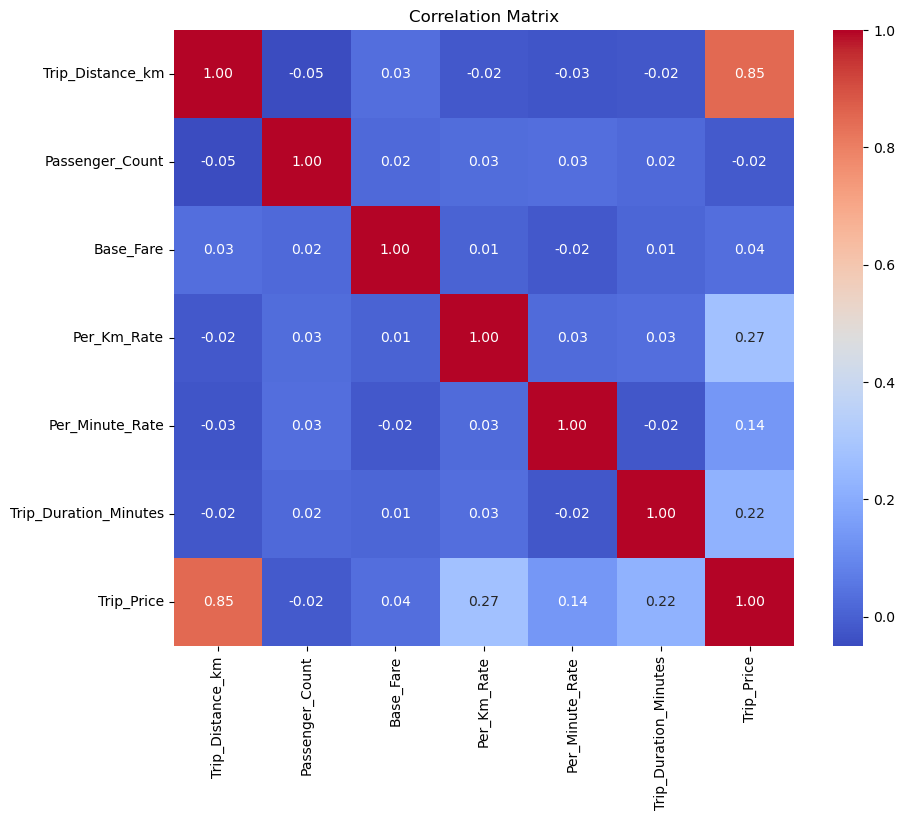

In [100]:
# Calcolare la matrice di correlazione per le variabili numeriche
correlation_matrix = df_taxi.corr()

# Visualizzare la matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


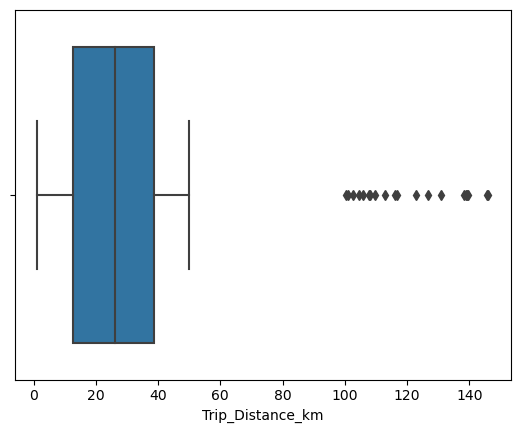

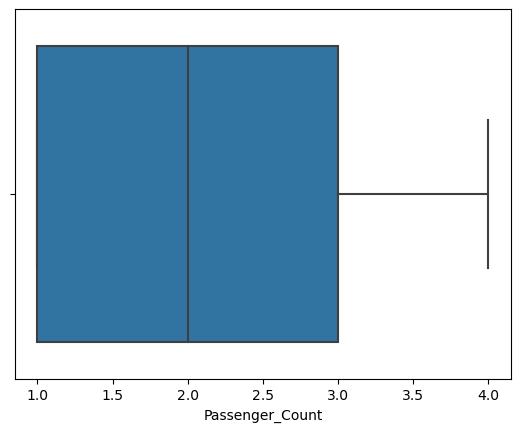

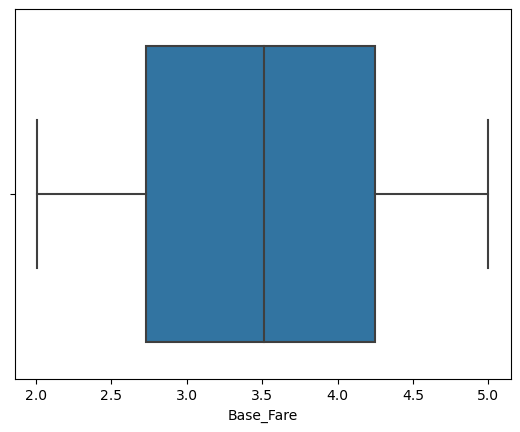

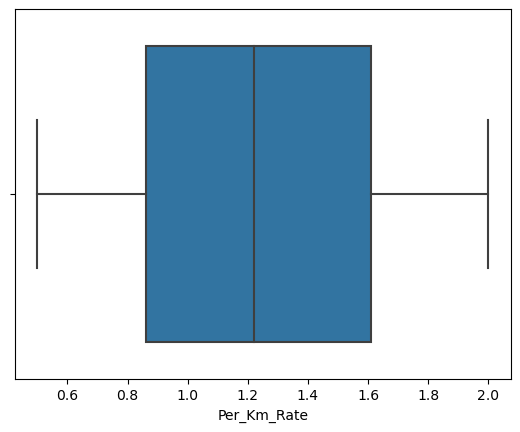

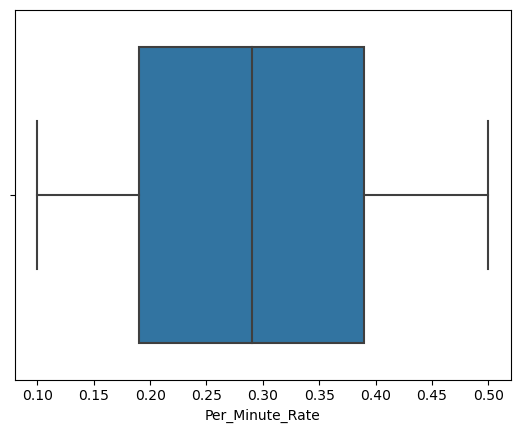

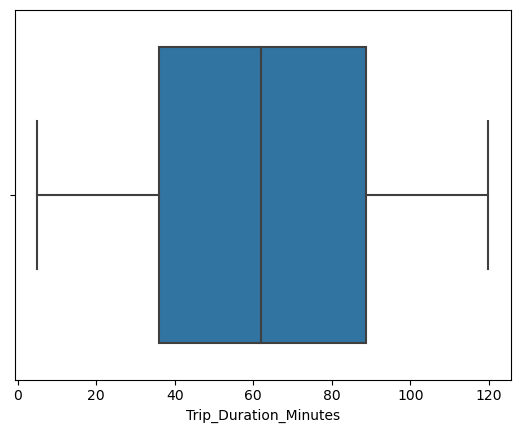

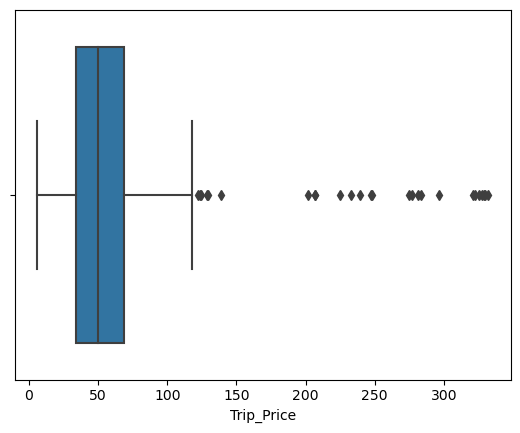

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# For a numerical column like 'Price'
quantitative_columns = ['Trip_Distance_km', 'Passenger_Count','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']

for column in quantitative_columns:
    sns.boxplot(x=df_taxi[column])
    plt.show()


In [103]:
# Check skewness for the relevant variables
skew_distance = df_taxi['Trip_Distance_km'].skew()
skew_price = df_taxi['Trip_Price'].skew()
skew_duration = df_taxi['Trip_Duration_Minutes'].skew()#we check also this variable because it has high variance

print(f"Skewness of 'Trip_Distance_km': {skew_distance}")
print(f"Skewness of 'Trip_Price': {skew_price}")
print(f"Skewness of 'Trip_Duration_Minutes': {skew_duration}")

#if the skewness is higher than 1, then we should apply log_transformation

Skewness of 'Trip_Distance_km': 2.232845430397109
Skewness of 'Trip_Price': 3.7319830187769125
Skewness of 'Trip_Duration_Minutes': 0.018308926471987792


In [104]:
import numpy as np

#applying log_transformation
df_taxi['Trip_Distance_km_log'] = np.log1p(df_taxi['Trip_Distance_km'])
df_taxi['Trip_Price_log'] = np.log1p(df_taxi['Trip_Price'])

#checking variance again
df_taxi.var()




/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_65197/2286503453.py:8: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_taxi.var()


Trip_Distance_km          398.788423
Passenger_Count             1.216373
Base_Fare                   0.756473
Per_Km_Rate                 0.184447
Per_Minute_Rate             0.013399
Trip_Duration_Minutes    1034.207336
Trip_Price               1647.948853
Trip_Distance_km_log        0.636125
Trip_Price_log              0.314930
dtype: float64

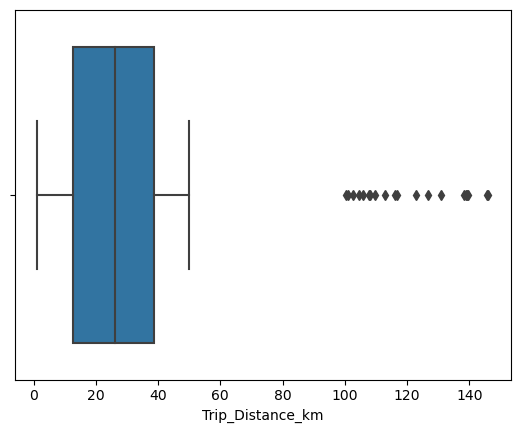

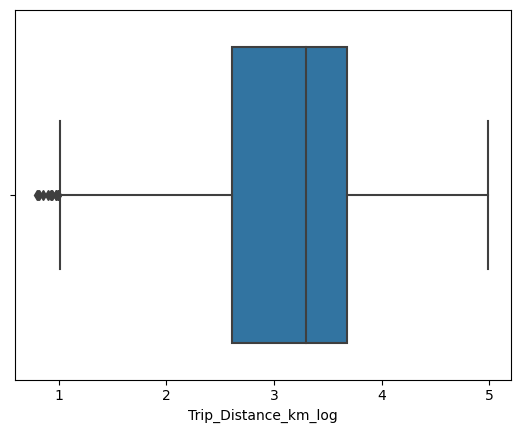

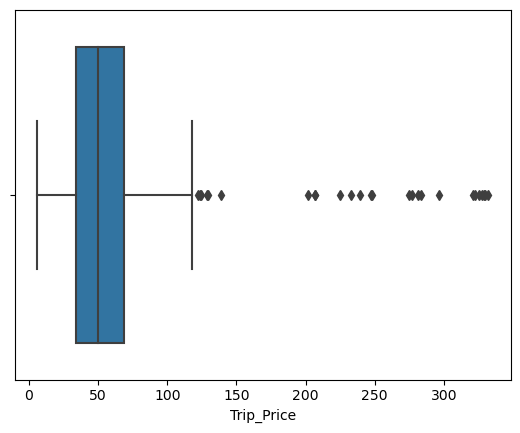

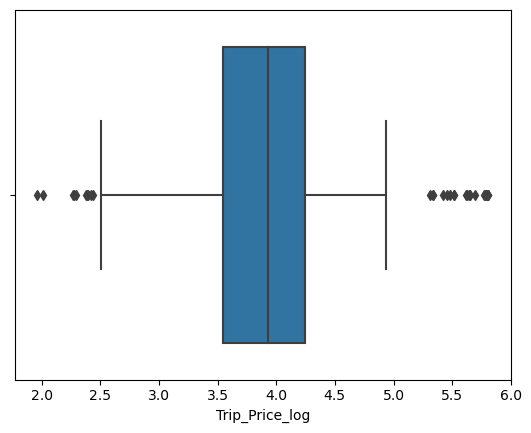

In [105]:
# For a numerical column like 'Price'
quantitative_columns = ['Trip_Distance_km', 'Trip_Distance_km_log', 'Trip_Price', 'Trip_Price_log']

for column in quantitative_columns:
    sns.boxplot(x=df_taxi[column])
    plt.show()

## Small analysis of categorical variable distribution

In [106]:


categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

for i in categorical_columns:
    print(f'Values for {i} are: {df_taxi[i].dropna().unique()}')


Values for Time_of_Day are: ['Morning' 'Afternoon' 'Evening' 'Night']
Values for Day_of_Week are: ['Weekday' 'Weekend']
Values for Traffic_Conditions are: ['Low' 'High' 'Medium']
Values for Weather are: ['Clear' 'Rain' 'Snow']


In [109]:
for i in categorical_columns:
    print(f''' Value occurrencies for {i}: 
          {df_taxi[i].value_counts(dropna=False)}''')

 Value occurrencies for Time_of_Day: 
          Afternoon    367
Morning      277
Evening      200
Night         93
NaN           49
Name: Time_of_Day, dtype: int64
 Value occurrencies for Day_of_Week: 
          Weekday    650
Weekend    293
NaN         43
Name: Day_of_Week, dtype: int64
 Value occurrencies for Traffic_Conditions: 
          Low       390
Medium    367
High      182
NaN        47
Name: Traffic_Conditions, dtype: int64
 Value occurrencies for Weather: 
          Clear    659
Rain     225
Snow      56
NaN       46
Name: Weather, dtype: int64


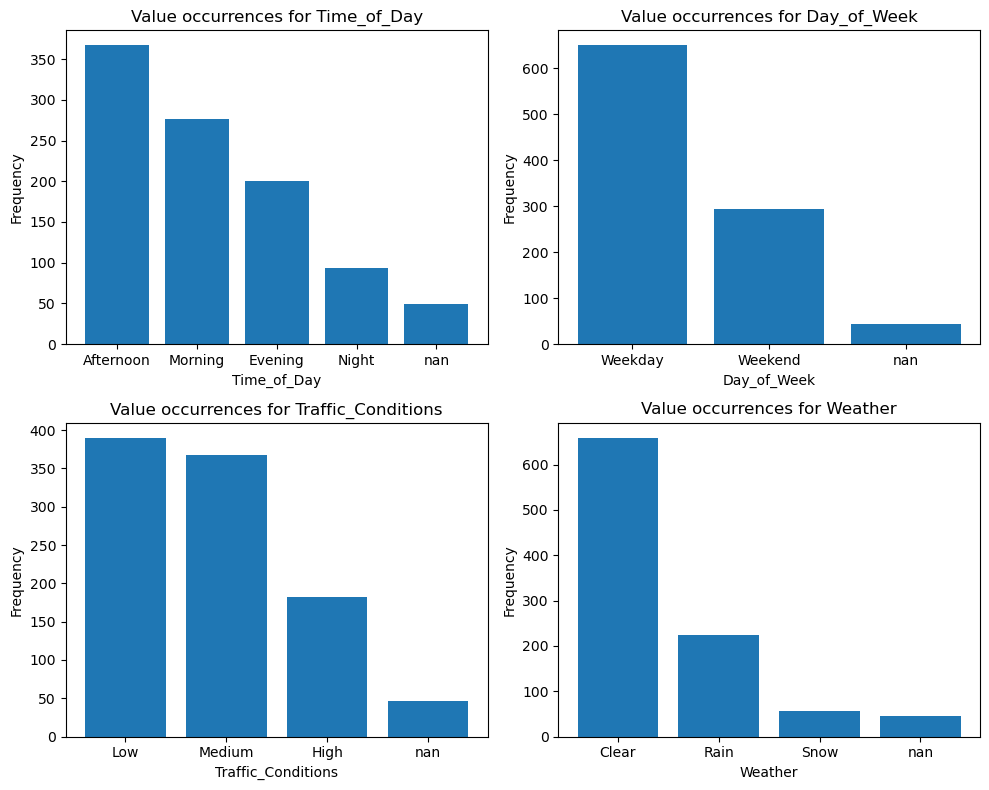

In [110]:
#Plot histograms for better visualization

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # to show all graphs together
axes = axes.flatten()

for i,column in enumerate (categorical_columns):
    value_counts= df_taxi[column].value_counts(dropna = False)

    value_counts.index= value_counts.index.astype(str)

    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(f'Value occurrences for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()



### FILLING NAs FOR QUANTITATIVE VARIABLES

* filling 'Base_Fare' with the mean because it is **numerical** and **continous**
* filling 'Passengers_Count' with the mode because it is **numerical** and **discrete**
* filling 'Per_Minute_Rate' with the ratio between 'Trip_Price' / 'Trip_Duration_Minutes'
* filling 'Per_Km_Rate' with the ratio between 'Trip_Price'/ 'Trip_Distance_km'
* filling 'Trip_Duration_Minutes' with the ratio betwen 'Trip_Price'/ 'Per_Minute_Rate'
* filling 'Trip_Distance_km' with the ratio between 'Trip_Price'/'Per_Km_Rate'
* filling 'Trip_Price_km' with 2 possible products: 
1) 'Trip_Distance_km' * 'Per_Km_Rate'
2) 'Trip_Duration_Minutes' * 'Per_Minute_Rate'


In [120]:
# Compute the mean and store it as a variable
base_fare_mean = df_taxi['Base_Fare'].mean()
# fill the NaN in Base fare using that value
df_taxi['Base_Fare'].fillna(base_fare_mean, inplace=True)


#compute the mode of 'Passengers' and store it as a variable
passengers_mode =df_taxi['Passenger_Count'].mode()[0]
df_taxi['Passenger_Count'].fillna(passengers_mode, inplace= True )


In [122]:
#check 

print(df_taxi.isna().sum())
print(df_taxi.describe())

Trip_Distance_km         47
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate              47
Per_Minute_Rate          47
Trip_Duration_Minutes    45
Trip_Price               44
Trip_Distance_km_log     47
Trip_Price_log           44
dtype: int64
       Trip_Distance_km  Passenger_Count   Base_Fare  Per_Km_Rate  \
count        939.000000       986.000000  986.000000   939.000000   
mean          27.135015         2.492901    3.500522     1.234888   
std           19.969688         1.083541    0.848298     0.429473   
min            1.230000         1.000000    2.010000     0.500000   
25%           12.635000         2.000000    2.770000     0.860000   
50%           26.030000         3.000000    3.500522     1.220000   
75%           38.695000         3.000000    4.200000     1.610000   
max          146.067047         4.000000    5.000000     2.000000   

 

In [ ]:
# Filling missing rates (Per_Minute_Rate)
df_taxi['Per_Minute_Rate'] = df_taxi['Per_Minute_Rate'].fillna(
    df_taxi.apply(lambda row: row['Trip_Price'] / row['Trip_Duration_Minutes'] 
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Trip_Duration_Minutes']) 
                  else row['Per_Minute_Rate'], axis=1))


# Filling missing rates (Per_Km_Rate)

df_taxi['Per_Km_Rate'] = df_taxi['Per_Km_Rate'].fillna(
    df_taxi.apply(lambda row: row['Trip_Price']/row ['Trip_Distance_km']
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Trip_Distance_km'])
                  else row['Per_Km_Rate'], axis =1))



In [130]:
df_taxi.isna().sum()

Trip_Distance_km         47
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate               5
Per_Minute_Rate           2
Trip_Duration_Minutes    45
Trip_Price               44
Trip_Distance_km_log     47
Trip_Price_log           44
dtype: int64

In [131]:
# Filling missing rates (Trip_Duration_Minutes)
df_taxi['Trip_Duration_Minutes'] = df_taxi['Trip_Duration_Minutes'].fillna(
    df_taxi.apply(lambda row: row['Trip_Price'] / row['Per_Minute_Rate'] 
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Per_Minute_Rate']) 
                  else row['Trip_Duration_Minutes'], axis=1))


# Filling missing rates (Trip_Distance_km)
df_taxi['Trip_Distance_km'] = df_taxi['Trip_Distance_km'].fillna(
    df_taxi.apply(lambda row: row['Trip_Price']/row ['Per_Km_Rate']
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Per_Km_Rate'])
                  else row['Trip_Distance_km'], axis =1))





In [132]:
df_taxi.isna().sum()

Trip_Distance_km          1
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate               5
Per_Minute_Rate           2
Trip_Duration_Minutes     4
Trip_Price               44
Trip_Distance_km_log     47
Trip_Price_log           44
dtype: int64

In [133]:
# Filling missing rates (Trip_Price) with Distance
df_taxi['Trip_Price'] = df_taxi['Trip_Price'].fillna(
    df_taxi.apply(lambda row: row['Trip_Distance_km']*row ['Per_Km_Rate']
                  if pd.notnull(row['Trip_Distance_km']) and pd.notnull(row['Per_Km_Rate'])
                  else row['Trip_Price'], axis =1))


# Filling missing rates (Trip_Price) with Minutes
df_taxi['Trip_Price'] = df_taxi['Trip_Price'].fillna(
    df_taxi.apply(lambda row: row['Trip_Duration_Minutes']*row ['Per_Minute_Rate']
                  if pd.notnull(row['Trip_Duration_Minutes']) and pd.notnull(row['Per_Minute_Rate'])
                  else row['Trip_Price'], axis =1))

In [134]:
df_taxi.isna().sum()

Trip_Distance_km          1
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate               5
Per_Minute_Rate           2
Trip_Duration_Minutes     4
Trip_Price                0
Trip_Distance_km_log     47
Trip_Price_log           44
dtype: int64

In [140]:
# now that we have the Trip_Price, we try again filling all the remaining numerical Nas

# Filling missing rates (Trip_Duration_Minutes)
df_taxi['Trip_Duration_Minutes'] = df_taxi['Trip_Duration_Minutes'].fillna(
    df_taxi.apply(lambda row: row['Trip_Price'] / row['Per_Minute_Rate'] 
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Per_Minute_Rate']) 
                  else row['Trip_Duration_Minutes'], axis=1))


# Filling missing rates (Trip_Distance_km)
df_taxi['Trip_Distance_km'] = df_taxi['Trip_Distance_km'].fillna(
    df_taxi.apply(lambda row: row['Trip_Price']/row ['Per_Km_Rate']
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Per_Km_Rate'])
                  else row['Trip_Distance_km'], axis =1))


In [138]:
# Filling missing rates (Per_Minute_Rate)
df_taxi['Per_Minute_Rate'] = df_taxi['Per_Minute_Rate'].fillna(
    df_taxi.apply(lambda row: row['Trip_Price'] / row['Trip_Duration_Minutes'] 
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Trip_Duration_Minutes']) 
                  else row['Per_Minute_Rate'], axis=1))


# Filling missing rates (Per_Km_Rate)

df_taxi['Per_Km_Rate'] = df_taxi['Per_Km_Rate'].fillna(
    df_taxi.apply(lambda row: row['Trip_Price']/row ['Trip_Distance_km']
                  if pd.notnull(row['Trip_Price']) and pd.notnull(row['Trip_Distance_km'])
                  else row['Per_Km_Rate'], axis =1))

In [142]:
df_taxi.isna().sum() #best we could do!! 

Trip_Distance_km          1
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate               1
Per_Minute_Rate           2
Trip_Duration_Minutes     2
Trip_Price                0
Trip_Distance_km_log     47
Trip_Price_log           44
dtype: int64

In [143]:
#applying AGAIN log_transformation
df_taxi['Trip_Distance_km_log'] = np.log1p(df_taxi['Trip_Distance_km'])
df_taxi['Trip_Price_log'] = np.log1p(df_taxi['Trip_Price'])

#checking variance again
df_taxi.var()




/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_65197/4118917848.py:6: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_taxi.var()


Trip_Distance_km          420.170521
Passenger_Count             1.174061
Base_Fare                   0.719610
Per_Km_Rate                 0.686311
Per_Minute_Rate             0.157211
Trip_Duration_Minutes    2549.396260
Trip_Price               1620.567158
Trip_Distance_km_log        0.638097
Trip_Price_log              0.352041
dtype: float64

In [144]:
df_taxi.isna().sum() #best we could do!! 

Trip_Distance_km          1
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate               1
Per_Minute_Rate           2
Trip_Duration_Minutes     2
Trip_Price                0
Trip_Distance_km_log      1
Trip_Price_log            0
dtype: int64

## ENCODING CATEGORICAL VARIABLES

